# **Load the Data**

In [5]:
import pandas as pd 
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

pd.set_option('mode.chained_assignment', None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Name your file as "kaggle_traind.xlsx"

In [8]:
from os.path import join  # merging paths in a better way

data_path = "/content/drive/My Drive/"
filename = "kaggle_train.xlsx"

df = pd.read_excel(join(data_path, filename),header=0)

df

,ID,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessYouTube,DataScienceIdentitySelect,FormalEducation,MajorSelect,Tenure,PastJobTitlesSelect,MLSkillsSelect,MLTechniquesSelect,EmployerIndustry,EmployerSize,WorkProductionFrequency,WorkAlgorithmsSelect,WorkToolsFrequencyPython,WorkToolsFrequencyR,WorkToolsFrequencySQL,WorkMethodsFrequencyCross-Validation,WorkMethodsFrequencyDataVisualization,WorkMethodsFrequencyDecisionTrees,WorkMethodsFrequencyLogisticRegression,WorkMethodsFrequencyNeuralNetworks,WorkMethodsFrequencyPCA,WorkMethodsFrequencyRandomForests,WorkMethodsFrequencyTimeSeriesAnalysis,WorkChallengeFrequencyPolitics,WorkChallengeFrequencyUnusedResults,WorkChallengeFrequencyDirtyData,WorkChallengeFrequencyExplaining,WorkChallengeFrequencyTalent,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,CompensationScore,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,RemoteWork,JobSatisfaction
0,1,Male,Pakistan,28.0,"Independent contractor, freelancer, or self-em...",Yes,Software Developer/Software Engineer,Fine,Self-employed,Python,Link Analysis,SAS,NaN,NaN,Very useful,NaN,NaN,NaN,Not Useful,Sort of (Explain more),Bachelor's degree,"Information technology, networking, or system ...",3 to 5 years,"Programmer,Software Developer/Software Engineer",Survival Analysis,"Hidden Markov Models HMMs,Logistic Regression,...",Technology,NaN,Always,Random Forests,Often,NaN,Often,NaN,NaN,NaN,NaN,NaN,NaN,Often,NaN,NaN,NaN,Often,NaN,NaN,NaN,NaN,8.0,51-75% of projects,Approximately half internal and half external,Standalone Team,NaN,4
1,2,Male,Mexico,26.0,Employed full-time,Yes,Computer Scientist,Poorly,Employed by a company that doesn't perform adv...,Python,Deep learning,Python,Somewhat useful,Very useful,NaN,NaN,NaN,Very useful,NaN,No,Master's degree,Computer Science,1 to 2 years,"Computer Scientist,Programmer,Researcher","Natural Language Processing,Supervised Machine...","Bayesian Techniques,Support Vector Machines (S...",Government,"1,000 to 4,999 employees",Rarely,"Bayesian Techniques,SVMs",Sometimes,Often,NaN,Sometimes,Most of the time,NaN,NaN,NaN,NaN,NaN,Rarely,NaN,NaN,NaN,NaN,Often,NaN,NaN,NaN,100% of projects,More internal than external,Business Department,NaN,7
2,3,Female,United States,34.0,Employed full-time,Yes,Data Analyst,Fine,Employed by government,TensorFlow,Deep learning,Python,Very useful,NaN,Somewhat useful,NaN,NaN,Somewhat useful,Somewhat useful,Sort of (Explain more),Doctoral degree,Mathematics or statistics,6 to 10 years,"Engineer,Operations Research Practitioner,Pred...",Supervised Machine Learning (Tabular Data),"Ensemble Methods,Evolutionary Approaches,Neura...",Government,"1,000 to 4,999 employees",Rarely,"Neural Networks,Regression/Logistic Regression",Sometimes,Often,NaN,Often,Often,NaN,NaN,Often,Sometimes,NaN,Sometimes,NaN,Sometimes,NaN,NaN,Sometimes,NaN,Most of the time,2.0,10-25% of projects,More internal than external,Other,Rarely,6
3,4,Female,United States,33.0,Employed full-time,Yes,Scientist/Researcher,Fine,Employed by college or university,IBM Watson / Waton Analytics,Cluster Analysis,Python,NaN,NaN,Very useful,NaN,Somewhat useful,NaN,NaN,No,Doctoral degree,Engineering (non-computer focused),More than 10 years,"Engineer,Researcher",Computer Vision,"Bayesian Techniques,Support Vector Machines (S...",Academic,"5,000 to 9,999 employees",Sometimes,"Markov Logic Networks,Regression/Logistic Regr...",Sometimes,NaN,NaN,NaN,Often,NaN,Sometimes,NaN,Often,NaN,Sometimes,NaN,NaN,NaN,NaN,NaN,Rarely,Rarely,2.0,76-99% of projects,Do not know,Other,Rarely,9
4,5,Female,United States,35.0,Employed full-time,Yes,Software Developer/Software Engineer

# **Preprocess the Data**

In [19]:
df.shape

(5529, 54)

## **NaN Values**

In [20]:
#Print number of NaN values

df.isna().sum()

ID                                           0
GenderSelect                                10
Country                                     16
Age                                         68
EmploymentStatus                             0
CodeWriter                                   0
CurrentJobTitleSelect                        2
TitleFit                                   102
CurrentEmployerType                         71
MLToolNextYearSelect                       231
MLMethodNextYearSelect                     277
LanguageRecommendationSelect               195
LearningPlatformUsefulnessBlogs           2998
LearningPlatformUsefulnessKaggle          2361
LearningPlatformUsefulnessCourses         2588
LearningPlatformUsefulnessProjects        3030
LearningPlatformUsefulnessSO              2533
LearningPlatformUsefulnessTextbook        3327
LearningPlatformUsefulnessYouTube         3116
DataScienceIdentitySelect                 1545
FormalEducation                              7
MajorSelect  

In [21]:
df.isnull().mean() #percentages

ID                                        0.000000
GenderSelect                              0.001809
Country                                   0.002894
Age                                       0.012299
EmploymentStatus                          0.000000
CodeWriter                                0.000000
CurrentJobTitleSelect                     0.000362
TitleFit                                  0.018448
CurrentEmployerType                       0.012841
MLToolNextYearSelect                      0.041780
MLMethodNextYearSelect                    0.050099
LanguageRecommendationSelect              0.035269
LearningPlatformUsefulnessBlogs           0.542232
LearningPlatformUsefulnessKaggle          0.427021
LearningPlatformUsefulnessCourses         0.468077
LearningPlatformUsefulnessProjects        0.548020
LearningPlatformUsefulnessSO              0.458130
LearningPlatformUsefulnessTextbook        0.601736
LearningPlatformUsefulnessYouTube         0.563574
DataScienceIdentitySelect      

In [22]:
#We have 5529 samples if more than 60% of samples are NaN values then we will not use that column

df_dropped = df[df.columns[df.isnull().mean() < 0.6]]
df_dropped.shape

(5529, 46)

We have dropped 8 columns which has more than 60% of NaN values

In [23]:
df_dropped.dtypes

ID                                          int64
GenderSelect                               object
Country                                    object
Age                                       float64
EmploymentStatus                           object
CodeWriter                                 object
CurrentJobTitleSelect                      object
TitleFit                                   object
CurrentEmployerType                        object
MLToolNextYearSelect                       object
MLMethodNextYearSelect                     object
LanguageRecommendationSelect               object
LearningPlatformUsefulnessBlogs            object
LearningPlatformUsefulnessKaggle           object
LearningPlatformUsefulnessCourses          object
LearningPlatformUsefulnessProjects         object
LearningPlatformUsefulnessSO               object
LearningPlatformUsefulnessYouTube          object
DataScienceIdentitySelect                  object
FormalEducation                            object


In [24]:
# Now we will impute NaN values with mean and mode values
# For numerical values with mean, for non-numerical values with mode

df_dropped['Age'] = df_dropped['Age'].fillna(df_dropped['Age'].mean())
df_dropped['CompensationScore'] = df_dropped['CompensationScore'].fillna(df_dropped['CompensationScore'].mean())


In [25]:
for col in df_dropped.columns:
  df_dropped[col] = df_dropped[col].fillna(df_dropped[col].mode()[0])

In [26]:
df_dropped.isna().sum()

ID                                        0
GenderSelect                              0
Country                                   0
Age                                       0
EmploymentStatus                          0
CodeWriter                                0
CurrentJobTitleSelect                     0
TitleFit                                  0
CurrentEmployerType                       0
MLToolNextYearSelect                      0
MLMethodNextYearSelect                    0
LanguageRecommendationSelect              0
LearningPlatformUsefulnessBlogs           0
LearningPlatformUsefulnessKaggle          0
LearningPlatformUsefulnessCourses         0
LearningPlatformUsefulnessProjects        0
LearningPlatformUsefulnessSO              0
LearningPlatformUsefulnessYouTube         0
DataScienceIdentitySelect                 0
FormalEducation                           0
MajorSelect                               0
Tenure                                    0
PastJobTitlesSelect             

In [27]:
df_dropped

,ID,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessYouTube,DataScienceIdentitySelect,FormalEducation,MajorSelect,Tenure,PastJobTitlesSelect,MLSkillsSelect,MLTechniquesSelect,EmployerIndustry,EmployerSize,WorkProductionFrequency,WorkAlgorithmsSelect,WorkToolsFrequencyPython,WorkToolsFrequencyR,WorkToolsFrequencySQL,WorkMethodsFrequencyCross-Validation,WorkMethodsFrequencyDataVisualization,WorkMethodsFrequencyDecisionTrees,WorkMethodsFrequencyLogisticRegression,WorkMethodsFrequencyRandomForests,WorkMethodsFrequencyTimeSeriesAnalysis,WorkChallengeFrequencyDirtyData,WorkChallengeFrequencyTalent,CompensationScore,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,RemoteWork,JobSatisfaction
0,1,Male,Pakistan,28.0,"Independent contractor, freelancer, or self-em...",Yes,Software Developer/Software Engineer,Fine,Self-employed,Python,Link Analysis,SAS,Very useful,Very useful,Very useful,Very useful,Very useful,Not Useful,Sort of (Explain more),Bachelor's degree,"Information technology, networking, or system ...",3 to 5 years,"Programmer,Software Developer/Software Engineer",Survival Analysis,"Hidden Markov Models HMMs,Logistic Regression,...",Technology,"10,000 or more employees",Always,Random Forests,Often,Most of the time,Often,Most of the time,Most of the time,Often,Often,Often,Often,Often,Often,8.000000,51-75% of projects,Approximately half internal and half external,Standalone Team,Sometimes,4
1,2,Male,Mexico,26.0,Employed full-time,Yes,Computer Scientist,Poorly,Employed by a company that doesn't perform adv...,Python,Deep learning,Python,Somewhat useful,Very useful,Very useful,Very useful,Very useful,Somewhat useful,No,Master's degree,Computer Science,1 to 2 years,"Computer Scientist,Programmer,Researcher","Natural Language Processing,Supervised Machine...","Bayesian Techniques,Support Vector Machines (S...",Government,"1,000 to 4,999 employees",Rarely,"Bayesian Techniques,SVMs",Sometimes,Often,Most of the time,Sometimes,Most of the time,Often,Often,Often,Rarely,Most of the time,Often,4.445003,100% of projects,More internal than external,Business Department,Sometimes,7
2,3,Female,United States,34.0,Employed full-time,Yes,Data Analyst,Fine,Employed by government,TensorFlow,Deep learning,Python,Very useful,Very useful,Somewhat useful,Very useful,Very useful,Somewhat useful,Sort of (Explain more),Doctoral degree,Mathematics or statistics,6 to 10 years,"Engineer,Operations Research Practitioner,Pred...",Supervised Machine Learning (Tabular Data),"Ensemble Methods,Evolutionary Approaches,Neura...",Government,"1,000 to 4,999 employees",Rarely,"Neural Networks,Regression/Logistic Regression",Sometimes,Often,Most of the time,Often,Often,Often,Often,Often,Sometimes,Most of the time,Sometimes,2.000000,10-25% of projects,More internal than external,Other,Rarely,6
3,4,Female,United States,33.0,Employed full-time,Yes,Scientist/Researcher,Fine,Employed by college or university,IBM Watson / Waton Analytics,Cluster Analysis,Python,Very useful,Very useful,Very useful,Very useful,Somewhat useful,Somewhat useful,No,Doctoral degree,Engineering (non-computer focused),More than 10 years,"Engineer,Researcher",Computer Vision,"Bayesian Techniques,Support Vector Machines (S...",Academic,"5,000 to 9,999 employees",Sometimes,"Markov Logic Networks,Regression/Logistic Regr...",Sometimes,Most of the time,Most of the time,Most of the time,Often,Often,Sometimes,Often,Sometimes,Most of the time,Often,2.000000,76-99% of projects,Do not know,Other,Rarely,9
4,5,Female,United States,35.0,Employed full-time,Yes,Software Developer/Software Engineer,Fine,Employed by a company that performs advanced a...,Google Cloud Compute,Neural Nets

## **Transforming Ordinal features**

TitleFit

In [28]:
df_dropped['TitleFit'].value_counts()

Fine         3655
Perfectly    1125
Poorly        749
Name: TitleFit, dtype: int64

In [29]:
TitleFit_map = {'Poorly':0,'Fine':1,'Perfectly':2}
df_dropped['TitleFit'] = df_dropped['TitleFit'].replace(TitleFit_map)

LearningPlatformUsefulnessBlogs

In [30]:
df_dropped['LearningPlatformUsefulnessBlogs'].value_counts()

Very useful        4257
Somewhat useful    1251
Not Useful           21
Name: LearningPlatformUsefulnessBlogs, dtype: int64

In [31]:
map = {'Not Useful':0,'Somewhat useful':1,'Very useful':2}

df_dropped['LearningPlatformUsefulnessBlogs'] = df_dropped['LearningPlatformUsefulnessBlogs'].replace(map)

LearningPlatformUsefulnessKaggle

In [32]:
df_dropped['LearningPlatformUsefulnessKaggle'].value_counts()

Very useful        4183
Somewhat useful    1320
Not Useful           26
Name: LearningPlatformUsefulnessKaggle, dtype: int64

In [33]:
df_dropped['LearningPlatformUsefulnessKaggle'] = df_dropped['LearningPlatformUsefulnessKaggle'].replace(map)

LearningPlatformUsefulnessCourses

In [34]:
df_dropped['LearningPlatformUsefulnessCourses'] = df_dropped['LearningPlatformUsefulnessCourses'].replace(map)

LearningPlatformUsefulnessProjects

In [35]:
df_dropped['LearningPlatformUsefulnessProjects'] = df_dropped['LearningPlatformUsefulnessProjects'].replace(map)

LearningPlatformUsefulnessSO

In [36]:
df_dropped['LearningPlatformUsefulnessSO'] = df_dropped['LearningPlatformUsefulnessSO'].replace(map)

LearningPlatformUsefulnessYouTube

In [37]:
df_dropped['LearningPlatformUsefulnessYouTube'] = df_dropped['LearningPlatformUsefulnessYouTube'].replace(map)

Tenure

In [38]:
df_dropped['Tenure'].value_counts()

3 to 5 years                          1658
1 to 2 years                          1244
More than 10 years                    1163
6 to 10 years                          982
Less than a year                       462
I don't write code to analyze data      20
Name: Tenure, dtype: int64

In [39]:
map = {"I don't write code to analyze data":0,"Less than a year":1,'1 to 2 years':2,'3 to 5 years':3,'6 to 10 years':4,'More than 10 years':5}

In [40]:
df_dropped['Tenure'] = df_dropped['Tenure'].replace(map)

EmployerSize

In [41]:
df_dropped['EmployerSize'].value_counts()

10,000 or more employees    1673
100 to 499 employees         841
20 to 99 employees           798
1,000 to 4,999 employees     736
500 to 999 employees         406
10 to 19 employees           314
5,000 to 9,999 employees     293
Fewer than 10 employees      291
I don't know                 140
I prefer not to answer        37
Name: EmployerSize, dtype: int64

In [42]:
map = {"Fewer than 10 employees":0,"10 to 19 employees":1,'20 to 99 employees':2,'100 to 499 employees':3,'500 to 999 employees':4,'1,000 to 4,999 employees':5,'5,000 to 9,999 employees':6,'10,000 or more employees':7}

In [43]:
df_dropped['EmployerSize'] = df_dropped['EmployerSize'].replace(map)

In [44]:
df_dropped['EmployerSize'].value_counts()

7                         1673
3                          841
2                          798
5                          736
4                          406
1                          314
6                          293
0                          291
I don't know               140
I prefer not to answer      37
Name: EmployerSize, dtype: int64

"I don't know" and "I prefer not to answer" values will be changed by the mean 

In [45]:
sum = 0
for i in range(8):
  sum += df_dropped['EmployerSize'].value_counts()[i] * i 

avg = sum / 5352
print(avg)

4.335949177877429


In [46]:
map = {"I don't know":4.33,"I prefer not to answer":4.33}
df_dropped['EmployerSize'] = df_dropped['EmployerSize'].replace(map)
df_dropped['EmployerSize'].value_counts()

7.00    1673
3.00     841
2.00     798
5.00     736
4.00     406
1.00     314
6.00     293
0.00     291
4.33     177
Name: EmployerSize, dtype: int64

WorkProductionFrequency

In [47]:
df_dropped['WorkProductionFrequency'].value_counts()

Sometimes           2353
Most of the time    1353
Rarely               848
Never                482
Always               361
Don't know           132
Name: WorkProductionFrequency, dtype: int64

In [48]:
map = {'Never':0,'Rarely':1,'Sometimes':2,'Most of the time':3,'Always':4}
df_dropped['WorkProductionFrequency'] = df_dropped['WorkProductionFrequency'].replace(map)
df_dropped['WorkProductionFrequency'].value_counts()

2             2353
3             1353
1              848
0              482
4              361
Don't know     132
Name: WorkProductionFrequency, dtype: int64

"Don't know" values will be changed by the mode 

In [49]:
map = {"Don't know":2}
df_dropped['WorkProductionFrequency'] = df_dropped['WorkProductionFrequency'].replace(map)
df_dropped['WorkProductionFrequency'].value_counts()

2    2485
3    1353
1     848
0     482
4     361
Name: WorkProductionFrequency, dtype: int64

WorkToolsFrequencyPython

In [50]:
df_dropped['WorkToolsFrequencyPython'].value_counts()

Most of the time    3663
Often                882
Sometimes            744
Rarely               240
Name: WorkToolsFrequencyPython, dtype: int64

In [51]:
map = {'Rarely':0,'Sometimes':1,'Often':2,'Most of the time':3}

df_dropped['WorkToolsFrequencyPython'] = df_dropped['WorkToolsFrequencyPython'].replace(map)
df_dropped['WorkToolsFrequencyPython'].value_counts()

3    3663
2     882
1     744
0     240
Name: WorkToolsFrequencyPython, dtype: int64

WorkToolsFrequencyR

In [52]:
df_dropped['WorkToolsFrequencyR'] = df_dropped['WorkToolsFrequencyR'].replace(map)
df_dropped['WorkToolsFrequencyR'].value_counts()

3    3616
1     824
2     766
0     323
Name: WorkToolsFrequencyR, dtype: int64

WorkToolsFrequencySQL

In [53]:
df_dropped['WorkToolsFrequencySQL'] = df_dropped['WorkToolsFrequencySQL'].replace(map)
df_dropped['WorkToolsFrequencySQL'].value_counts()

3    4029
2     840
1     533
0     127
Name: WorkToolsFrequencySQL, dtype: int64

WorkMethodsFrequencyCross-Validation

In [54]:
df_dropped['WorkMethodsFrequencyCross-Validation'] = df_dropped['WorkMethodsFrequencyCross-Validation'].replace(map)
df_dropped['WorkMethodsFrequencyCross-Validation'].value_counts()

3    3946
2     984
1     526
0      73
Name: WorkMethodsFrequencyCross-Validation, dtype: int64

WorkMethodsFrequencyDataVisualization

In [55]:
df_dropped['WorkMethodsFrequencyDataVisualization'] = df_dropped['WorkMethodsFrequencyDataVisualization'].replace(map)
df_dropped['WorkMethodsFrequencyDataVisualization'].value_counts()

3    4119
2    1062
1     311
0      37
Name: WorkMethodsFrequencyDataVisualization, dtype: int64

WorkMethodsFrequencyDecisionTrees

In [56]:
df_dropped['WorkMethodsFrequencyDecisionTrees'] = df_dropped['WorkMethodsFrequencyDecisionTrees'].replace(map)
df_dropped['WorkMethodsFrequencyDecisionTrees'].value_counts()

2    3908
1     894
3     579
0     148
Name: WorkMethodsFrequencyDecisionTrees, dtype: int64

WorkMethodsFrequencyLogisticRegression

In [57]:
df_dropped['WorkMethodsFrequencyLogisticRegression'] = df_dropped['WorkMethodsFrequencyLogisticRegression'].replace(map)
df_dropped['WorkMethodsFrequencyLogisticRegression'].value_counts()

2    3713
1     914
3     753
0     149
Name: WorkMethodsFrequencyLogisticRegression, dtype: int64

WorkMethodsFrequencyRandomForests

In [58]:
df_dropped['WorkMethodsFrequencyRandomForests'] = df_dropped['WorkMethodsFrequencyRandomForests'].replace(map)
df_dropped['WorkMethodsFrequencyRandomForests'].value_counts()

2    4023
1     804
3     573
0     129
Name: WorkMethodsFrequencyRandomForests, dtype: int64

WorkMethodsFrequencyTimeSeriesAnalysis

In [59]:
df_dropped['WorkMethodsFrequencyTimeSeriesAnalysis'] = df_dropped['WorkMethodsFrequencyTimeSeriesAnalysis'].replace(map)
df_dropped['WorkMethodsFrequencyTimeSeriesAnalysis'].value_counts()

2    4072
1     691
3     657
0     109
Name: WorkMethodsFrequencyTimeSeriesAnalysis, dtype: int64

WorkChallengeFrequencyDirtyData

In [60]:
df_dropped['WorkChallengeFrequencyDirtyData'] = df_dropped['WorkChallengeFrequencyDirtyData'].replace(map)
df_dropped['WorkChallengeFrequencyDirtyData'].value_counts()

3    3942
2    1119
1     449
0      19
Name: WorkChallengeFrequencyDirtyData, dtype: int64

WorkChallengeFrequencyTalent

In [61]:
df_dropped['WorkChallengeFrequencyTalent'] = df_dropped['WorkChallengeFrequencyTalent'].replace(map)
df_dropped['WorkChallengeFrequencyTalent'].value_counts()


2    4112
3     734
1     631
0      52
Name: WorkChallengeFrequencyTalent, dtype: int64

WorkDataVisualizations

In [62]:
df_dropped['WorkDataVisualizations'].value_counts()

100% of projects             1051
76-99% of projects           1013
10-25% of projects            991
51-75% of projects            931
26-50% of projects            711
Less than 10% of projects     702
None                          130
Name: WorkDataVisualizations, dtype: int64

In [63]:
map = {'None':0,'Less than 10% of projects':1,'10-25% of projects':2,'26-50% of projects':3,'51-75% of projects':4,'76-99% of projects':5,'100% of projects':6}

df_dropped['WorkDataVisualizations'] = df_dropped['WorkDataVisualizations'].replace(map)
df_dropped['WorkDataVisualizations'].value_counts()

6    1051
5    1013
2     991
4     931
3     711
1     702
0     130
Name: WorkDataVisualizations, dtype: int64

RemoteWork

In [64]:
df_dropped['RemoteWork'].value_counts()

Sometimes           2560
Rarely              1425
Never                684
Most of the time     555
Always               285
Don't know            20
Name: RemoteWork, dtype: int64

In [65]:
map = {'Never':0,'Rarely':1,'Sometimes':2,"Don't know":2,'Most of the time':3,'Always':4}

df_dropped['RemoteWork'] = df_dropped['RemoteWork'].replace(map)
df_dropped['RemoteWork'].value_counts()

2    2580
1    1425
0     684
3     555
4     285
Name: RemoteWork, dtype: int64

## **More Preprocess**

ID is useless, so drop it

In [66]:
df_dropped = df_dropped.drop(['ID'], axis = 1)

Everyone is codewriter

In [67]:
df_dropped['CodeWriter'].value_counts()

Yes    5529
Name: CodeWriter, dtype: int64

So we will drop codewriter column

In [68]:
df_dropped = df_dropped.drop(['CodeWriter'], axis = 1)

In [69]:
df_dropped


,GenderSelect,Country,Age,EmploymentStatus,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessYouTube,DataScienceIdentitySelect,FormalEducation,MajorSelect,Tenure,PastJobTitlesSelect,MLSkillsSelect,MLTechniquesSelect,EmployerIndustry,EmployerSize,WorkProductionFrequency,WorkAlgorithmsSelect,WorkToolsFrequencyPython,WorkToolsFrequencyR,WorkToolsFrequencySQL,WorkMethodsFrequencyCross-Validation,WorkMethodsFrequencyDataVisualization,WorkMethodsFrequencyDecisionTrees,WorkMethodsFrequencyLogisticRegression,WorkMethodsFrequencyRandomForests,WorkMethodsFrequencyTimeSeriesAnalysis,WorkChallengeFrequencyDirtyData,WorkChallengeFrequencyTalent,CompensationScore,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,RemoteWork,JobSatisfaction
0,Male,Pakistan,28.0,"Independent contractor, freelancer, or self-em...",Software Developer/Software Engineer,1,Self-employed,Python,Link Analysis,SAS,2,2,2,2,2,0,Sort of (Explain more),Bachelor's degree,"Information technology, networking, or system ...",3,"Programmer,Software Developer/Software Engineer",Survival Analysis,"Hidden Markov Models HMMs,Logistic Regression,...",Technology,7.0,4,Random Forests,2,3,2,3,3,2,2,2,2,2,2,8.000000,4,Approximately half internal and half external,Standalone Team,2,4
1,Male,Mexico,26.0,Employed full-time,Computer Scientist,0,Employed by a company that doesn't perform adv...,Python,Deep learning,Python,1,2,2,2,2,1,No,Master's degree,Computer Science,2,"Computer Scientist,Programmer,Researcher","Natural Language Processing,Supervised Machine...","Bayesian Techniques,Support Vector Machines (S...",Government,5.0,1,"Bayesian Techniques,SVMs",1,2,3,1,3,2,2,2,0,3,2,4.445003,6,More internal than external,Business Department,2,7
2,Female,United States,34.0,Employed full-time,Data Analyst,1,Employed by government,TensorFlow,Deep learning,Python,2,2,1,2,2,1,Sort of (Explain more),Doctoral degree,Mathematics or statistics,4,"Engineer,Operations Research Practitioner,Pred...",Supervised Machine Learning (Tabular Data),"Ensemble Methods,Evolutionary Approaches,Neura...",Government,5.0,1,"Neural Networks,Regression/Logistic Regression",1,2,3,2,2,2,2,2,1,3,1,2.000000,2,More internal than external,Other,1,6
3,Female,United States,33.0,Employed full-time,Scientist/Researcher,1,Employed by college or university,IBM Watson / Waton Analytics,Cluster Analysis,Python,2,2,2,2,1,1,No,Doctoral degree,Engineering (non-computer focused),5,"Engineer,Researcher",Computer Vision,"Bayesian Techniques,Support Vector Machines (S...",Academic,6.0,2,"Markov Logic Networks,Regression/Logistic Regr...",1,3,3,3,2,2,1,2,1,3,2,2.000000,5,Do not know,Other,1,9
4,Female,United States,35.0,Employed full-time,Software Developer/Software Engineer,1,Employed by a company that performs advanced a...,Google Cloud Compute,Neural Nets,Python,2,2,1,2,2,1,No,Doctoral degree,Mathematics or statistics,5,"Researcher,Software Developer/Software Engineer",Computer Vision,"Bayesian Techniques,Evolutionary Approaches,Lo...",Internet-based,7.0,2,"Bayesian Techniques,CNNs,Regression/Logistic R...",3,3,3,3,3,2,1,2,2,3,2,8.000000,6,Entirely internal,Other,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,Male,Canada,48.0,Employed full-time,Data Scientist,1,Employed by professional services/consulting firm,DataRobot,Neural Nets,SAS,2,2,2,2,2,1,Yes,Doctoral degree,Mathematics or statistics,5,"Data Analyst,Data Scientist,Predictive Modeler...","Outlier detection (e.g. Fraud detection),Super...","Decision Trees - Gradient Boosted Machines,Dec...",Mix of fields,2.0,4,"Decision Trees,Markov Logic Networks,Regressio...",3,

# **Data Visualization**

## **Barcharts**

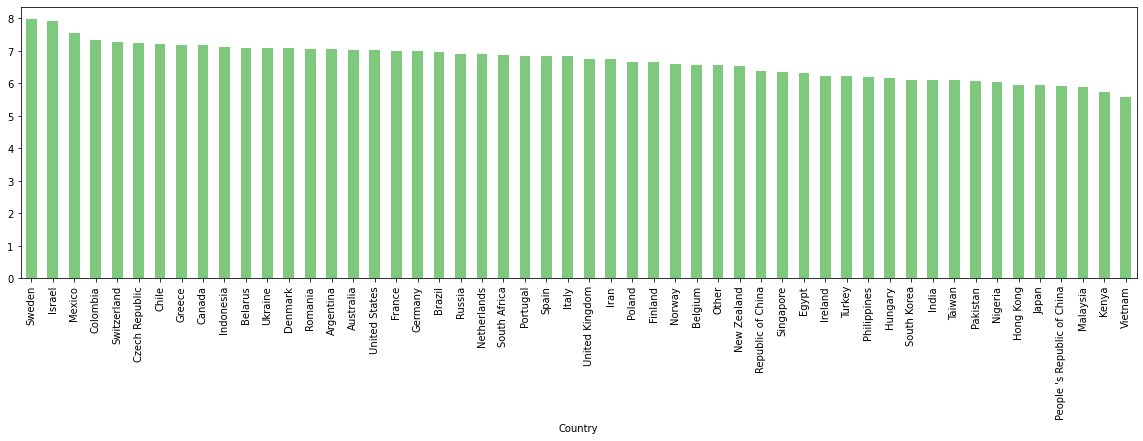

In [70]:
import matplotlib.pyplot as plt

df_plot = df.groupby(['Country'])['JobSatisfaction'].mean()

df_plot = df_plot.sort_values(ascending=False)

df_plot.plot(kind='bar',figsize=(20,5),colormap="Accent")

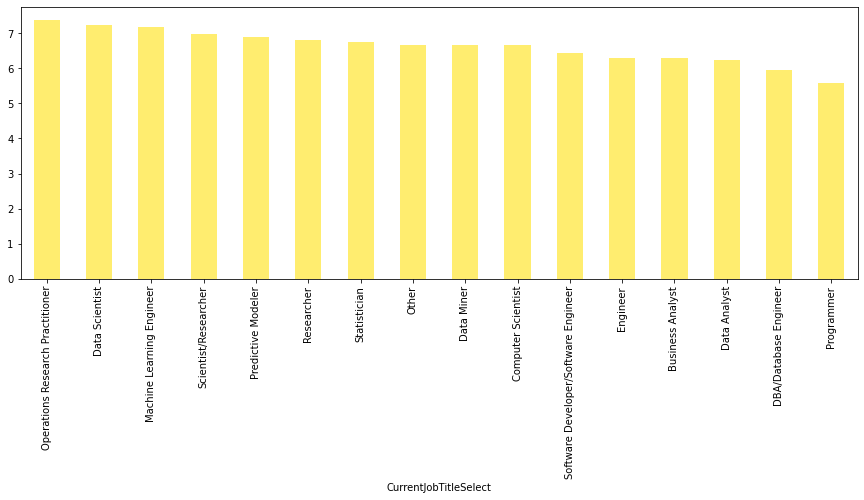

In [71]:
df_plot = df.groupby(['CurrentJobTitleSelect'])['JobSatisfaction'].mean()

df_plot = df_plot.sort_values(ascending=False)

df_plot.plot(kind='bar',figsize=(15,5),colormap="Set3_r")

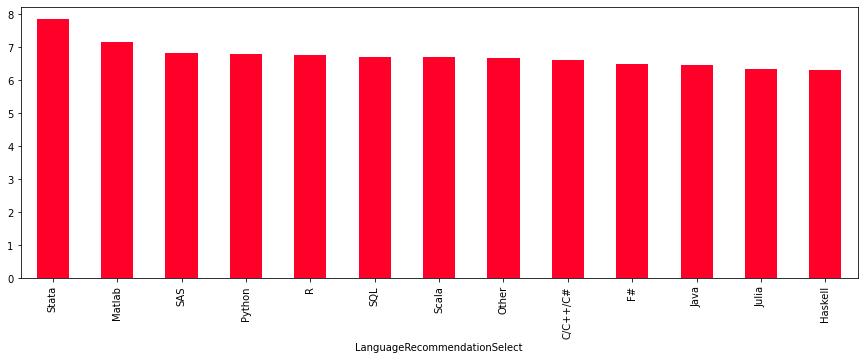

In [72]:
df_plot = df.groupby(['LanguageRecommendationSelect'])['JobSatisfaction'].mean()

df_plot = df_plot.sort_values(ascending=False)

df_plot.plot(kind='bar',figsize=(15,5),colormap="gist_rainbow")

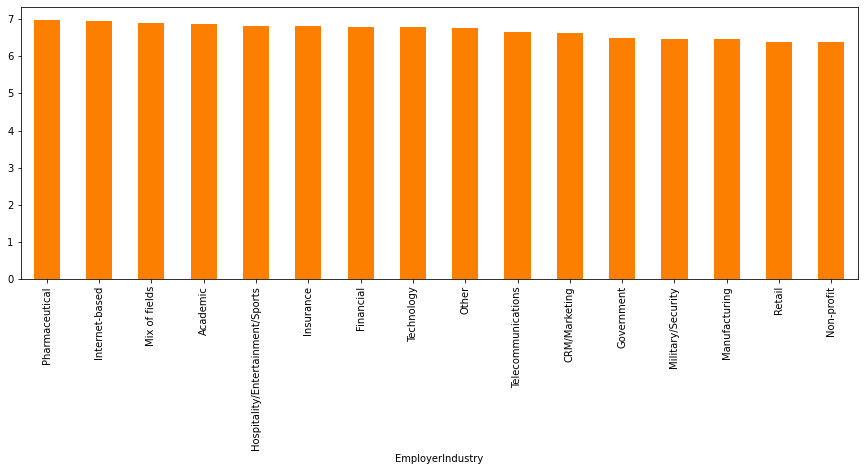

In [73]:
df_plot = df.groupby(['EmployerIndustry'])['JobSatisfaction'].mean()

df_plot = df_plot.sort_values(ascending=False)

df_plot.plot(kind='bar',figsize=(15,5),colormap="Wistia_r")

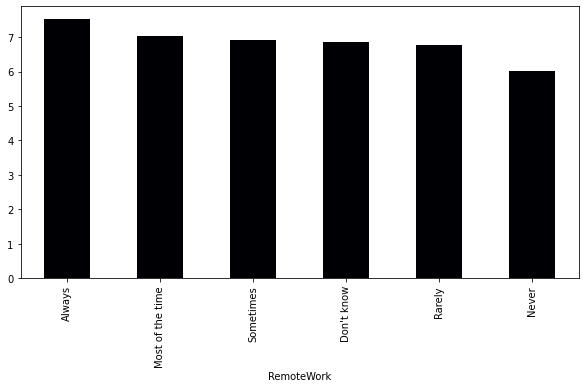

In [74]:
import matplotlib.pyplot as plt

df_plot = df.groupby(['RemoteWork'])['JobSatisfaction'].mean()

df_plot = df_plot.sort_values(ascending=False)

df_plot.plot(kind='bar',figsize=(10,5),colormap="magma")

In [76]:
df_dropped

,GenderSelect,Country,Age,EmploymentStatus,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessYouTube,DataScienceIdentitySelect,FormalEducation,MajorSelect,Tenure,PastJobTitlesSelect,MLSkillsSelect,MLTechniquesSelect,EmployerIndustry,EmployerSize,WorkProductionFrequency,WorkAlgorithmsSelect,WorkToolsFrequencyPython,WorkToolsFrequencyR,WorkToolsFrequencySQL,WorkMethodsFrequencyCross-Validation,WorkMethodsFrequencyDataVisualization,WorkMethodsFrequencyDecisionTrees,WorkMethodsFrequencyLogisticRegression,WorkMethodsFrequencyRandomForests,WorkMethodsFrequencyTimeSeriesAnalysis,WorkChallengeFrequencyDirtyData,WorkChallengeFrequencyTalent,CompensationScore,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,RemoteWork,JobSatisfaction
0,Male,Pakistan,28.0,"Independent contractor, freelancer, or self-em...",Software Developer/Software Engineer,1,Self-employed,Python,Link Analysis,SAS,2,2,2,2,2,0,Sort of (Explain more),Bachelor's degree,"Information technology, networking, or system ...",3,"Programmer,Software Developer/Software Engineer",Survival Analysis,"Hidden Markov Models HMMs,Logistic Regression,...",Technology,7.0,4,Random Forests,2,3,2,3,3,2,2,2,2,2,2,8.000000,4,Approximately half internal and half external,Standalone Team,2,4
1,Male,Mexico,26.0,Employed full-time,Computer Scientist,0,Employed by a company that doesn't perform adv...,Python,Deep learning,Python,1,2,2,2,2,1,No,Master's degree,Computer Science,2,"Computer Scientist,Programmer,Researcher","Natural Language Processing,Supervised Machine...","Bayesian Techniques,Support Vector Machines (S...",Government,5.0,1,"Bayesian Techniques,SVMs",1,2,3,1,3,2,2,2,0,3,2,4.445003,6,More internal than external,Business Department,2,7
2,Female,United States,34.0,Employed full-time,Data Analyst,1,Employed by government,TensorFlow,Deep learning,Python,2,2,1,2,2,1,Sort of (Explain more),Doctoral degree,Mathematics or statistics,4,"Engineer,Operations Research Practitioner,Pred...",Supervised Machine Learning (Tabular Data),"Ensemble Methods,Evolutionary Approaches,Neura...",Government,5.0,1,"Neural Networks,Regression/Logistic Regression",1,2,3,2,2,2,2,2,1,3,1,2.000000,2,More internal than external,Other,1,6
3,Female,United States,33.0,Employed full-time,Scientist/Researcher,1,Employed by college or university,IBM Watson / Waton Analytics,Cluster Analysis,Python,2,2,2,2,1,1,No,Doctoral degree,Engineering (non-computer focused),5,"Engineer,Researcher",Computer Vision,"Bayesian Techniques,Support Vector Machines (S...",Academic,6.0,2,"Markov Logic Networks,Regression/Logistic Regr...",1,3,3,3,2,2,1,2,1,3,2,2.000000,5,Do not know,Other,1,9
4,Female,United States,35.0,Employed full-time,Software Developer/Software Engineer,1,Employed by a company that performs advanced a...,Google Cloud Compute,Neural Nets,Python,2,2,1,2,2,1,No,Doctoral degree,Mathematics or statistics,5,"Researcher,Software Developer/Software Engineer",Computer Vision,"Bayesian Techniques,Evolutionary Approaches,Lo...",Internet-based,7.0,2,"Bayesian Techniques,CNNs,Regression/Logistic R...",3,3,3,3,3,2,1,2,2,3,2,8.000000,6,Entirely internal,Other,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,Male,Canada,48.0,Employed full-time,Data Scientist,1,Employed by professional services/consulting firm,DataRobot,Neural Nets,SAS,2,2,2,2,2,1,Yes,Doctoral degree,Mathematics or statistics,5,"Data Analyst,Data Scientist,Predictive Modeler...","Outlier detection (e.g. Fraud detection),Super...","Decision Trees - Gradient Boosted Machines,Dec...",Mix of fields,2.0,4,"Decision Trees,Markov Logic Networks,Regressio...",3,

WorkDataVisualizations
10-25% of projects            991
100% of projects             1022
26-50% of projects            711
51-75% of projects            931
76-99% of projects           1013
Less than 10% of projects     702
None                          130
dtype: int64


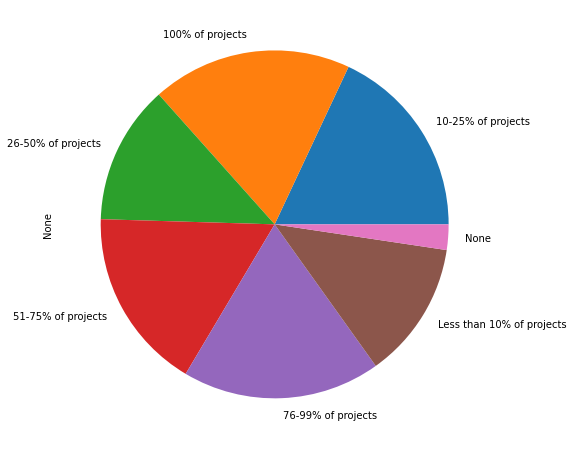

In [85]:
df_plot= df.groupby('WorkDataVisualizations').size()
print(df_plot)
df_plot.plot.pie(figsize=(8,8))


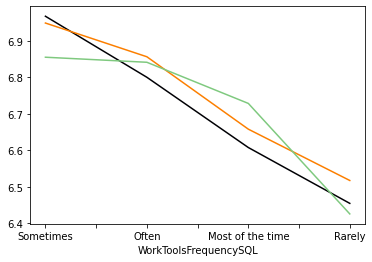

In [111]:
import matplotlib.pyplot as plt

# for the use of Python frequency
df_plot = df.groupby(['WorkToolsFrequencyPython'])['JobSatisfaction'].mean()
df_plot = df_plot.sort_values(ascending=False)
df_plot.plot(kind='line',figsize=(6,4),colormap="magma")

# for the use of R frequency
df_plot = df.groupby(['WorkToolsFrequencyR'])['JobSatisfaction'].mean()
df_plot = df_plot.sort_values(ascending=False)
df_plot.plot(kind='line',figsize=(6,4),colormap="Wistia_r")

# for the use of SQL frequency
df_plot = df.groupby(['WorkToolsFrequencySQL'])['JobSatisfaction'].mean()
df_plot = df_plot.sort_values(ascending=False)
df_plot.plot(kind='line',figsize=(6,4),colormap="Accent")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fec36a547b8>],
      dtype=object)

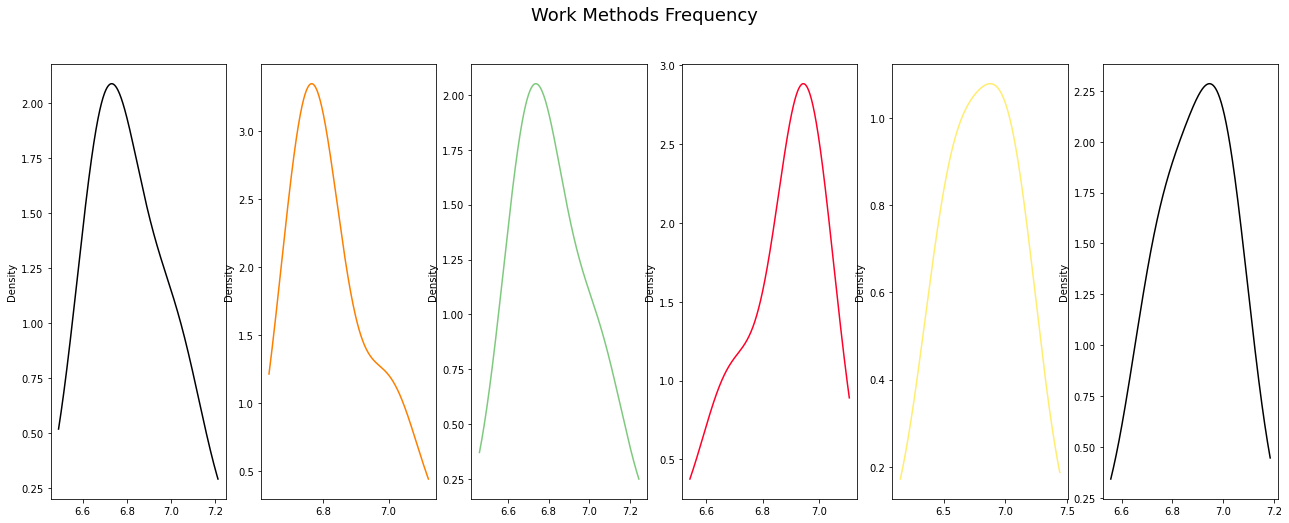

In [126]:
fig, axs = plt.subplots(1, 6, figsize=(22,8), sharey=True)
fig.suptitle('Work Methods Frequency', fontsize=18)

plt.subplot(1,6,1)
df_plot = df_dropped.groupby(['WorkMethodsFrequencyCross-Validation'])['JobSatisfaction'].mean()
df_plot = df_plot.sort_values(ascending=False)
df_plot.plot(kind='kde',figsize=(5,3),colormap="magma", subplots=bool)

plt.subplot(1,6,2)
df_plot = df_dropped.groupby(['WorkMethodsFrequencyDataVisualization'])['JobSatisfaction'].mean()
df_plot = df_plot.sort_values(ascending=False)
df_plot.plot(kind='kde',figsize=(5,3),colormap="Wistia_r",subplots=bool)

plt.subplot(1,6,3)
df_plot = df_dropped.groupby(['WorkMethodsFrequencyDecisionTrees'])['JobSatisfaction'].mean()
df_plot = df_plot.sort_values(ascending=False)
df_plot.plot(kind='kde',figsize=(5,3),colormap="Accent",subplots=bool)

plt.subplot(1,6,4)
df_plot = df_dropped.groupby(['WorkMethodsFrequencyLogisticRegression'])['JobSatisfaction'].mean()
df_plot = df_plot.sort_values(ascending=False)
df_plot.plot(kind='kde',figsize=(5,3),colormap="gist_rainbow",subplots=bool)

plt.subplot(1,6,5)
df_plot = df_dropped.groupby(['WorkMethodsFrequencyRandomForests'])['JobSatisfaction'].mean()
df_plot = df_plot.sort_values(ascending=False)
df_plot.plot(kind='kde',figsize=(5,3),colormap="Set3_r",subplots=bool)

plt.subplot(1,6,6)
df_plot = df_dropped.groupby(['WorkMethodsFrequencyTimeSeriesAnalysis'])['JobSatisfaction'].mean()
df_plot = df_plot.sort_values(ascending=False)
df_plot.plot(kind='kde',figsize=(5,3),colormap="gist_stern",subplots=bool)
